In [165]:
import numpy as np
df = np.loadtxt('ex2data1.txt', delimiter=',')

In [166]:
df[:5]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

In [167]:
X = np.c_[ np.ones(len(df)), df[ : , :(df.shape[1]-1)] ]

In [168]:
y = df[ : , df.shape[1]-1 ]

In [169]:
np.argwhere(y==0).flatten()

array([ 0,  1,  2,  5, 10, 11, 14, 17, 20, 22, 23, 27, 28, 29, 32, 34, 35,
       36, 38, 39, 41, 43, 44, 45, 53, 54, 55, 57, 61, 62, 63, 64, 65, 67,
       70, 78, 79, 86, 89, 92])

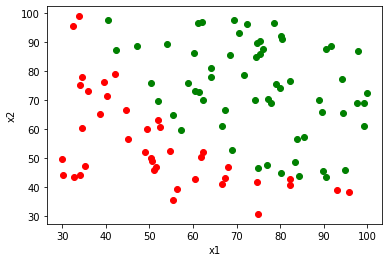

In [172]:
import matplotlib.pyplot as plt

g1 = X[np.argwhere(y==0).flatten()] 
g2 = X[np.argwhere(y==1).flatten()]

# Create plot
plt.plot(g1[:,1], g1[:,2], 'ro', color='red', label="not_admitted")
plt.plot(g2[:,1], g2[:,2], 'ro', color='green', label="admitted")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [173]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [174]:
def loss(X, y, theta):
    return (-y.dot(np.log(sigmoid(X.dot(theta))))-(1-y).dot(np.log(1-sigmoid(X.dot(theta)))))/len(X)

In [175]:
def gradient_descent_step(X, y, theta, alfa):
    return theta - alfa / len(X) * (sigmoid(X.dot(theta)) - y).dot(X)

In [176]:
def find_mean(X):
    return 1/len(X) * np.transpose(X).dot(np.ones(len(X)))

In [177]:
def find_standard_deviation(X):
    return np.sqrt(np.transpose(X - find_mean(X)).dot((X - find_mean(X)))/len(X))

In [178]:
def normalize(X, indices_to_normalize):
    temp = np.copy(X)
    mean = find_mean(X)
    sd = find_standard_deviation(X)
    for i in indices_to_normalize: # don't normalize the bias!
        temp[:,i] = (X[:,i] - mean[i])/sd[i, i]
    return temp, mean, sd

In [179]:
def normalize_with_given_stats(X, indices_to_normalize, mean, sd):
    temp = np.copy(X)
    for i in indices_to_normalize: # don't normalize the bias!
        temp[:,i] = (X[:,i] - mean[i])/sd[i, i]
    return temp

In [190]:
# train

alfa = 0.3
iterations = 1000

theta = np.zeros(X.shape[1]) # init theta
losses = np.zeros(iterations)
X_normalized, mean, sd = normalize(X, [1,2])

for i in range(iterations):
    theta = gradient_descent_step(X_normalized, y, theta, alfa)
    losses[i] = loss(X_normalized, y, theta)
    
theta

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


array([1.60785488, 3.75729212, 3.49729869])

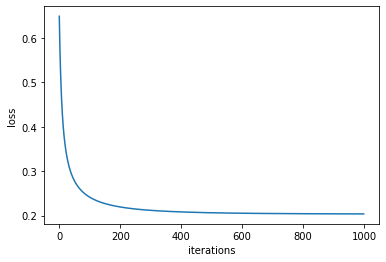

In [193]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()

In [194]:
losses[-1]

0.20386278731842125

In [195]:
# predict
X_normalized = normalize_with_given_stats(X, [1,2], mean, sd)
y_predicted = np.round(sigmoid(X_normalized.dot(theta)))
print(y_predicted)

[0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1.]


In [196]:
def print_confusion_matrix(y, y_predicted):
    TP = 0
    for i in range(len(y)):
        TP += np.where(y[i] == 1 and y_predicted[i] == 1,1,0)
    FP = 0
    for i in range(len(y)):
        FP += np.where(y[i] == 0 and y_predicted[i] == 1,1,0)
    TN = 0
    for i in range(len(y)):
        TN += np.where(y[i] == 0 and y_predicted[i] == 0,1,0)
    FN = 0
    for i in range(len(y)):
        FN += np.where(y[i] == 1 and y_predicted[i] == 0,1,0)
    print("      Actual Values")
    print("Pred. Pos    Neg")
    print("Pos   {}   {}".format(np.round(TP/len(y),2), np.round(FP/len(y),2)))
    print("Neg   {}   {}".format(np.round(FN/len(y),2), np.round(TN/len(y),2)))

In [197]:
print_confusion_matrix(y, y_predicted)

      Actual Values
Pred. Pos    Neg
Pos   0.55   0.06
Neg   0.05   0.34


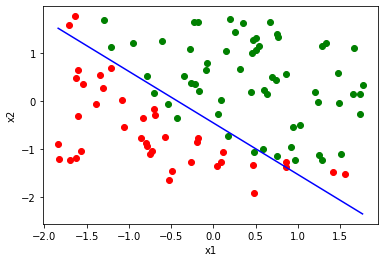

In [198]:
import matplotlib.pyplot as plt

g1 = X_normalized[np.argwhere(y==0).flatten()] 
g2 = X_normalized[np.argwhere(y==1).flatten()]

decision_boundary_x1 = np.linspace(np.amin(X_normalized, 0)[1], np.amax(X_normalized, 0)[1], 100)
decision_boundary_x2 = -theta[0]/theta[2]-theta[1]/theta[2]*decision_boundary_x1

# Create plot
plt.plot(g1[:,1], g1[:,2], 'ro', color='red', label="not_admitted")
plt.plot(g2[:,1], g2[:,2], 'ro', color='green', label="admitted")
plt.plot(decision_boundary_x1, decision_boundary_x2, color='blue', label="decision_boundary")
plt.plot()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

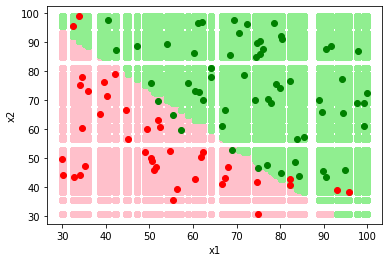

In [205]:
# alternative plot with decision boundary

import matplotlib.pyplot as plt

g1 = X[np.argwhere(y==0).flatten()] 
g2 = X[np.argwhere(y==1).flatten()]

# create a wiremesh for the plane that the predicted values will lie
xx, yy, zz = np.meshgrid(X[:, 0], X[:, 1], X[:, 2])
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
Z = np.round(sigmoid(normalize_with_given_stats(combinedArrays, [1,2], mean, sd).dot(theta)))

p1 = combinedArrays[np.argwhere(Z==0).flatten()] 
p2 = combinedArrays[np.argwhere(Z==1).flatten()]

# Create plot

# decision boundary
plt.plot(p1[:,1], p1[:,2], 'ro', color='pink')
plt.plot(p2[:,1], p2[:,2], 'ro', color='lightgreen')

# actual values
plt.plot(g1[:,1], g1[:,2], 'ro', color='red')
plt.plot(g2[:,1], g2[:,2], 'ro', color='green')

plt.plot()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()